# CITI Bike Share Data Systems
## by Saher Ramzy

## Preliminary Wrangling

> Where do Citi Bikers ride? When do they ride? How far do they go? Which stations are most popular? What days of the week are most rides taken on? We've heard all of these questions and more from you, and we're happy to provide the data to help you discover the answers to these questions and more. We invite developers, engineers, statisticians, artists, academics and other interested members of the public to use the data we provide for analysis, development, visualization and whatever else moves you

In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

> Load in your dataset and describe its properties through the questions below.
Try and motivate your exploration goals through this section.

In [3]:
df = pd.read_csv('202001-citibike-tripdata.csv')
df.head()


,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,789,2020-01-01 00:00:55.3900,2020-01-01 00:14:05.1470,504,1 Ave & E 16 St,40.732219,-73.981656,307,Canal St & Rutgers St,40.714275,-73.989900,30326,Subscriber,1992,1
1,1541,2020-01-01 00:01:08.1020,2020-01-01 00:26:49.1780,3423,West Drive & Prospect Park West,40.661063,-73.979453,3300,Prospect Park West & 8 St,40.665147,-73.976376,17105,Customer,1969,1
2,1464,2020-01-01 00:01:42.1400,2020-01-01 00:26:07.0110,3687,E 33 St & 1 Ave,40.743227,-73.974498,259,South St & Whitehall St,40.701221,-74.012342,40177,Subscriber,1963,1
3,592,2020-01-01 00:01:45.5610,2020-01-01 00:11:38.1550,346,Bank St & Hudson St,40.736529,-74.006180,490,8 Ave & W 33 St,40.751551,-73.993934,27690,Subscriber,1980,1
4,702,2020-01-01 00:01:45.7880,2020-01-01 00:13:28.2400,372,Franklin Ave & Myrtle Ave,40.694546,-73.958014,3637,Fulton St & Waverly Ave,40.683239,-73.965996,32583,Subscriber,1982,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1240596 entries, 0 to 1240595
Data columns (total 15 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   tripduration             1240596 non-null  int64  
 1   starttime                1240596 non-null  object 
 2   stoptime                 1240596 non-null  object 
 3   start station id         1240596 non-null  int64  
 4   start station name       1240596 non-null  object 
 5   start station latitude   1240596 non-null  float64
 6   start station longitude  1240596 non-null  float64
 7   end station id           1240596 non-null  int64  
 8   end station name         1240596 non-null  object 
 9   end station latitude     1240596 non-null  float64
 10  end station longitude    1240596 non-null  float64
 11  bikeid                   1240596 non-null  int64  
 12  usertype                 1240596 non-null  object 
 13  birth year               1240596 non-null 

In [6]:
df.describe()

,tripduration,start station id,start station latitude,start station longitude,end station id,end station latitude,end station longitude,bikeid,birth year,gender
count,1.240596e+06,1.240596e+06,1.240596e+06,1.240596e+06,1.240596e+06,1.240596e+06,1.240596e+06,1.240596e+06,1.240596e+06,1.240596e+06
mean,7.846299e+02,1.676428e+03,4.073759e+01,-7.398175e+01,1.666457e+03,4.073724e+01,-7.398205e+01,3.267581e+04,1.979777e+03,1.179057e+00
std,6.076151e+03,1.495895e+03,2.970666e-02,1.931888e-02,1.495605e+03,2.946039e-02,1.940547e-02,8.057179e+03,1.242231e+01,4.887083e-01
min,6.100000e+01,7.200000e+01,4.065540e+01,-7.401713e+01,7.200000e+01,4.065540e+01,-7.403548e+01,1.453000e+04,1.885000e+03,0.000000e+00
25%,3.230000e+02,3.850000e+02,4.071882e+01,-7.399456e+01,3.830000e+02,4.071882e+01,-7.399468e+01,2.854700e+04,1.970000e+03,1.000000e+00
50%,5.290000e+02,5.130000e+02,4.073913e+01,-7.398484e+01,5.090000e+02,4.073827e+01,-7.398565e+01,3.390200e+04,1.982000e+03,1.000000e+00
75%,8.940000e+02,3.317000e+03,4.075680e+01,-7.397210e+01,3.317000e+03,4.075641e+01,-7.397283e+01,3.974800e+04,1.990000e+03,1.000000e+00
max,1.952746e+06,3.918000e+03,4.081830e+01,-7.389795e+01,3.918000e+03,4.081830e+01,-7.389795e+01,4.209100e+04,2.004000e+03,2.000000e+00


In [7]:
df.isnull().sum()

tripduration               0
starttime                  0
stoptime                   0
start station id           0
start station name         0
start station latitude     0
start station longitude    0
end station id             0
end station name           0
end station latitude       0
end station longitude      0
bikeid                     0
usertype                   0
birth year                 0
gender                     0
dtype: int64

In [8]:
df.gender = df.gender.replace({1 : "Male", 2: "Female", 0: "Other"})
df.gender.value_counts()

Male      904522
Female    279106
Other      56968
Name: gender, dtype: int64

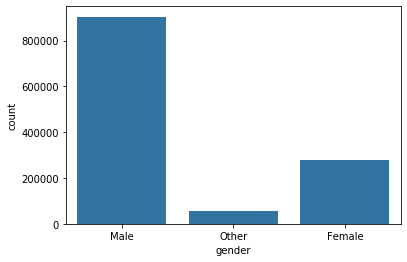

In [9]:
color = sb.color_palette()[0]
sb.countplot(data = df , x=df.gender, color = color)

In [10]:
df.starttime = pd.to_datetime(df.starttime)
df.stoptime = pd.to_datetime(df.stoptime)

In [11]:
df['starttime_DOW']= df['starttime'].dt.strftime('%a')
df['starttime_hour']= df['starttime'].dt.hour

In [12]:
# Convert the starttime_DOW to ordinal variables.
weekdays = ['Mon','Tue','Wed','Thu','Fri', 'Sat', 'Sun']
ordered_weekdays = pd.api.types.CategoricalDtype(ordered = True, categories = weekdays)
df['starttime_DOW'] = df['starttime_DOW'].astype(ordered_weekdays)

In [13]:
# Calculate member_age from member_birth_year.
df['member_age'] = 2020 - df['birth year']


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1240596 entries, 0 to 1240595
Data columns (total 18 columns):
 #   Column                   Non-Null Count    Dtype         
---  ------                   --------------    -----         
 0   tripduration             1240596 non-null  int64         
 1   starttime                1240596 non-null  datetime64[ns]
 2   stoptime                 1240596 non-null  datetime64[ns]
 3   start station id         1240596 non-null  int64         
 4   start station name       1240596 non-null  object        
 5   start station latitude   1240596 non-null  float64       
 6   start station longitude  1240596 non-null  float64       
 7   end station id           1240596 non-null  int64         
 8   end station name         1240596 non-null  object        
 9   end station latitude     1240596 non-null  float64       
 10  end station longitude    1240596 non-null  float64       
 11  bikeid                   1240596 non-null  int64         
 12  

### What is the structure of your dataset?

> The dataset has +1M bike rides that happen in 2020 in New York City. The dataset contained features about:

Trip Duration (seconds) : how long the trip took in seconds
Start Time and Date
Stop Time and Date
Start Station Name
End Station Name
Station ID
Station Lat/Long
Bike ID
User Type (Customer = 24-hour pass or 3-day pass user; Subscriber = Annual Member)
Gender (Zero=unknown; 1=male; 2=female)
Year of Birth

starttime_hour 
starttime_DOW: for weekdays
customer_age

### What is/are the main feature(s) of interest in your dataset?

> I am interested in investigate duration of biking time 
> And each gender biking more and when .

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> I think the following features may help to support my investigation into the feature (duration) I am interested.

start_time - I extracted dayofweek, hours for further investigation.
birth_year - we may use member age and investigate the relationship between member age and bike durations.
member_gender
user_type

## Univariate Exploration

Let's start with member age

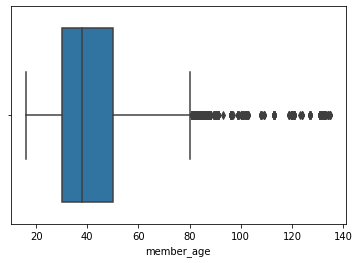

In [15]:
sb.boxplot(data = df, x = 'member_age')

In [16]:
# now delete the outliers 
df = df[df["member_age"] <= 80]
df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,starttime_DOW,starttime_hour,member_age
0,789,2020-01-01 00:00:55.390,2020-01-01 00:14:05.147,504,1 Ave & E 16 St,40.732219,-73.981656,307,Canal St & Rutgers St,40.714275,-73.989900,30326,Subscriber,1992,Male,Wed,0,28
1,1541,2020-01-01 00:01:08.102,2020-01-01 00:26:49.178,3423,West Drive & Prospect Park West,40.661063,-73.979453,3300,Prospect Park West & 8 St,40.665147,-73.976376,17105,Customer,1969,Male,Wed,0,51
2,1464,2020-01-01 00:01:42.140,2020-01-01 00:26:07.011,3687,E 33 St & 1 Ave,40.743227,-73.974498,259,South St & Whitehall St,40.701221,-74.012342,40177,Subscriber,1963,Male,Wed,0,57
3,592,2020-01-01 00:01:45.561,2020-01-01 00:11:38.155,346,Bank St & Hudson St,40.736529,-74.006180,490,8 Ave & W 33 St,40.751551,-73.993934,27690,Subscriber,1980,Male,Wed,0,40
4,702,2020-01-01 00:01:45.788,2020-01-01 00:13:28.240,372,Franklin Ave & Myrtle Ave,40.694546,-73.958014,3637,Fulton St & Waverly Ave,40.683239,-73.965996,32583,Subscriber,1982,Male,Wed,0,38


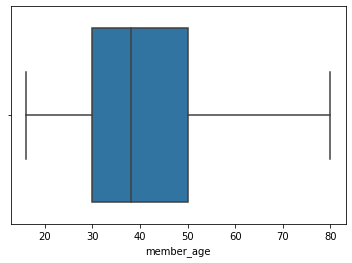

In [17]:
sb.boxplot(data = df, x = 'member_age')

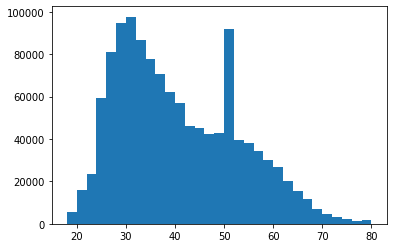

In [18]:
binsize = 2
bins = np.arange(18, df['member_age'].max()+binsize, binsize)
plt.hist(data = df, x = 'member_age', bins = bins);

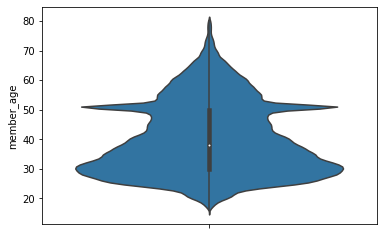

In [19]:
sb.violinplot(data = df, y = 'member_age');

it's great for member_age now , There are many bikers are around 30 , 50 age . There are not that many bikers above age 70.

now let's check trip duration 

In [20]:
df['duration_min'] = df['tripduration']/60
df.info()

C:\Users\ecotel\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1238163 entries, 0 to 1240595
Data columns (total 19 columns):
 #   Column                   Non-Null Count    Dtype         
---  ------                   --------------    -----         
 0   tripduration             1238163 non-null  int64         
 1   starttime                1238163 non-null  datetime64[ns]
 2   stoptime                 1238163 non-null  datetime64[ns]
 3   start station id         1238163 non-null  int64         
 4   start station name       1238163 non-null  object        
 5   start station latitude   1238163 non-null  float64       
 6   start station longitude  1238163 non-null  float64       
 7   end station id           1238163 non-null  int64         
 8   end station name         1238163 non-null  object        
 9   end station latitude     1238163 non-null  float64       
 10  end station longitude    1238163 non-null  float64       
 11  bikeid                   1238163 non-null  int64         
 12  

In [21]:
df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,starttime_DOW,starttime_hour,member_age,duration_min
0,789,2020-01-01 00:00:55.390,2020-01-01 00:14:05.147,504,1 Ave & E 16 St,40.732219,-73.981656,307,Canal St & Rutgers St,40.714275,-73.989900,30326,Subscriber,1992,Male,Wed,0,28,13.150000
1,1541,2020-01-01 00:01:08.102,2020-01-01 00:26:49.178,3423,West Drive & Prospect Park West,40.661063,-73.979453,3300,Prospect Park West & 8 St,40.665147,-73.976376,17105,Customer,1969,Male,Wed,0,51,25.683333
2,1464,2020-01-01 00:01:42.140,2020-01-01 00:26:07.011,3687,E 33 St & 1 Ave,40.743227,-73.974498,259,South St & Whitehall St,40.701221,-74.012342,40177,Subscriber,1963,Male,Wed,0,57,24.400000
3,592,2020-01-01 00:01:45.561,2020-01-01 00:11:38.155,346,Bank St & Hudson St,40.736529,-74.006180,490,8 Ave & W 33 St,40.751551,-73.993934,27690,Subscriber,1980,Male,Wed,0,40,9.866667
4,702,2020-01-01 00:01:45.788,2020-01-01 00:13:28.240,372,Franklin Ave & Myrtle Ave,40.694546,-73.958014,3637,Fulton St & Waverly Ave,40.683239,-73.965996,32583,Subscriber,1982,Male,Wed,0,38,11.700000


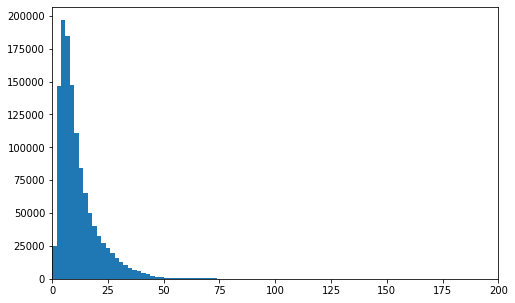

In [26]:
binsize = 2
bins = np.arange(0, df['duration_min'].max(), binsize)

plt.figure(figsize=[8, 5])

plt.hist(data = df, x = 'duration_min', bins=bins);
plt.xlim(0,200)
plt.show()

In [47]:
df['duration_min'].describe()

count    1.240596e+06
mean     1.258602e+01
std      1.012691e+02
min      1.000000e+00
25%      5.000000e+00
50%      8.000000e+00
75%      1.400000e+01
max      3.254500e+04
Name: duration_min, dtype: float64

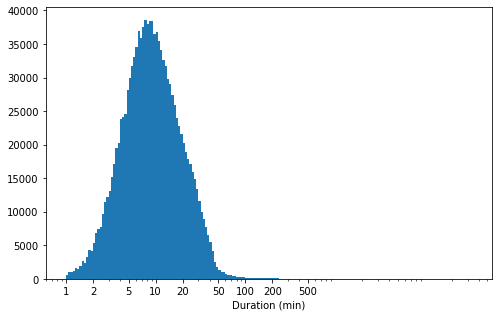

In [59]:
log_binsize = 0.025
bins = 10 ** np.arange(0, np.log10(df['duration_min'].max())+log_binsize, log_binsize)

plt.figure(figsize=[8, 5]);
plt.hist(data = df, x = 'duration_min', bins = bins);
plt.xscale('log');
plt.xticks([1, 2, 5, 10, 20, 50, 100, 200, 500], [1, 2, 5, 10, 20, 50, 100, 200, 500]);
plt.xlabel('Duration_min');

The distribution now normal. But, there are outliers.

In [62]:
df = df[df['duration_min'] <= 100]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1235856 entries, 0 to 1240595
Data columns (total 19 columns):
 #   Column                   Non-Null Count    Dtype         
---  ------                   --------------    -----         
 0   tripduration             1235856 non-null  int64         
 1   starttime                1235856 non-null  datetime64[ns]
 2   stoptime                 1235856 non-null  datetime64[ns]
 3   start station id         1235856 non-null  int64         
 4   start station name       1235856 non-null  object        
 5   start station latitude   1235856 non-null  float64       
 6   start station longitude  1235856 non-null  float64       
 7   end station id           1235856 non-null  int64         
 8   end station name         1235856 non-null  object        
 9   end station latitude     1235856 non-null  float64       
 10  end station longitude    1235856 non-null  float64       
 11  bikeid                   1235856 non-null  int64         
 12  

In [63]:
# the final data
df.to_csv('master_file.csv', index=False)

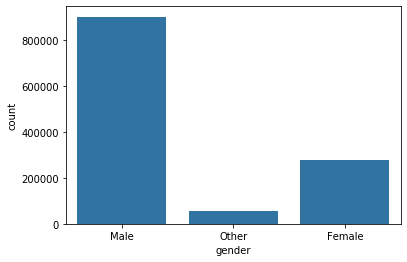

In [71]:
color = sb.color_palette()[0]
sb.countplot(data = df, x = 'gender', color = color);

it's obvious that Male bikers are about 3 times of female bikers.

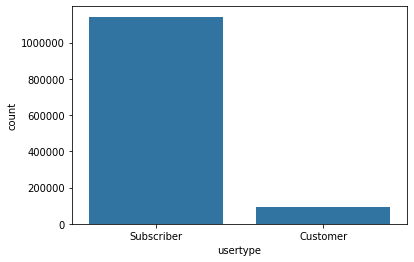

In [72]:
sb.countplot(data = df, x = 'usertype', color = color);

subscribers bikers are much more than customer

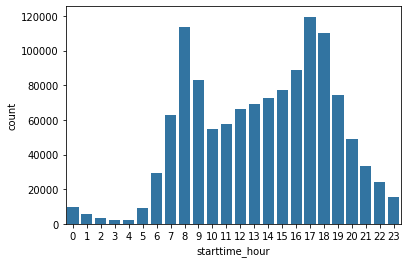

In [73]:
sb.countplot(data = df, x = 'starttime_hour', color = color);

the peak hours for biking in 8:00 am and 5:00 pm

### Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

<Figure size 1440x1440 with 0 Axes>

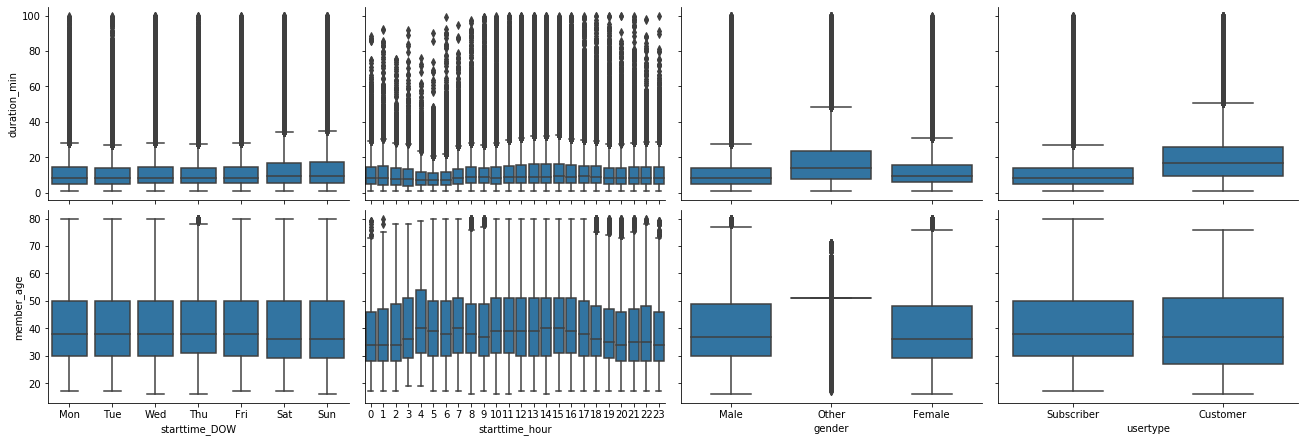

In [114]:
categoric_vars = ['starttime_DOW', 'starttime_hour', 'gender', 'usertype']
samples = np.random.choice(df.shape[0], 2000, replace = False);
# samp = df.loc[samples]

def boxgrid(x, y, **kwargs):
    
    default_color = sb.color_palette()[0];
    sb.boxplot(x, y, color = default_color);
    

plt.figure(figsize = [20, 20]);
g = sb.PairGrid(data = df, y_vars = ['duration_min', 'member_age'], x_vars = categoric_vars, height = 3, aspect = 1.5);
g.map(boxgrid);

plt.show()

> data from above plots :
- Biker ride on weekends [Saturday and Sunday] longer durations compared to other weekdays.
- Bikers rides start between 11:00 AM to 2:00 PM have the longest mean durations compared to other time frames.
- Female bikers bike longer on average compared to male bikers.
- Bikers with user_type 'Customer' bikes longer on average compared to 'Subscriber' bikers .
- The mean age of bikers on weekends [Saturday and Sunday] is lower than mean age of bikers on other days.
- The mean age of bikers who start 4:00 AM and 7:00 AM is higher compared to other times in the day
- The mean age of male bikers is higher than the mean age of female bikers.
- The mean age of bikers who have 'Subscriber' type is higher than the mean age of bikers who have 'Customer' type. 

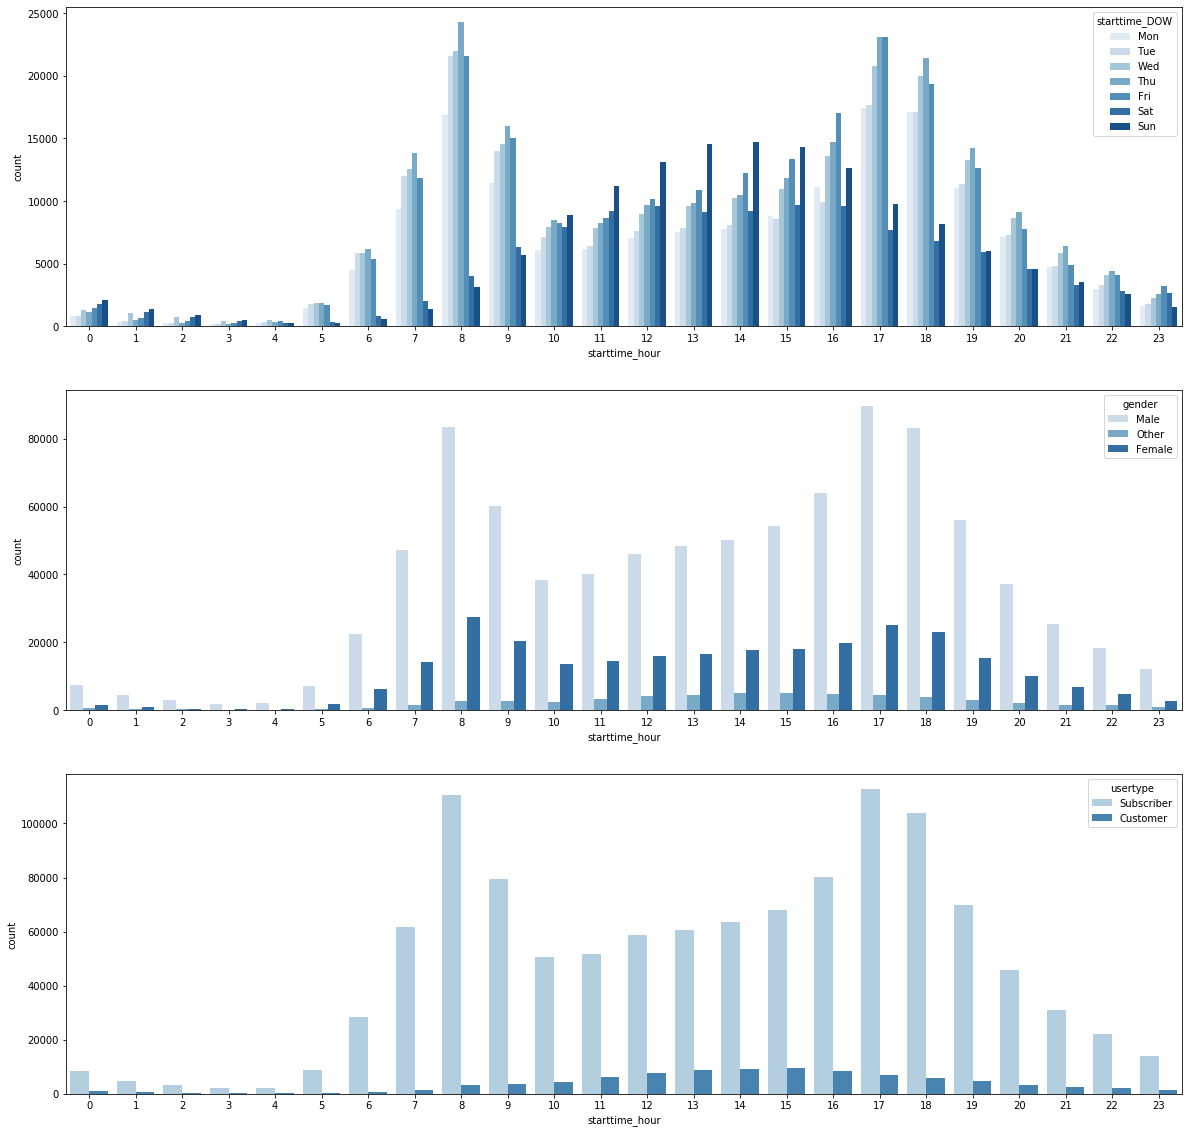

In [105]:
# plot some distribution for starttime_hour

plt.figure(figsize = [20, 20]);

plt.subplot(3, 1, 1);
sb.countplot(data = df, x = 'starttime_hour', hue = 'starttime_DOW', palette = 'Blues');

ax = plt.subplot(3, 1, 2);
sb.countplot(data = df, x = 'starttime_hour', hue = 'gender', palette = 'Blues');

ax = plt.subplot(3, 1, 3);
sb.countplot(data = df, x = 'starttime_hour', hue = 'usertype', palette = 'Blues');

> data from above plots:
- Thursday , 8:00 AM has the highest biker counts across All The Week
- 5:00 PM has the most male bikers compared to other hours. 8:00 AM and 5:00 PM have more female bikers compared to other hours.
- 5:00 PM has the most 'Subscriber' bikers compared to other hours. 3:00 pm has the most 'Customer' bikers compared to other hours.

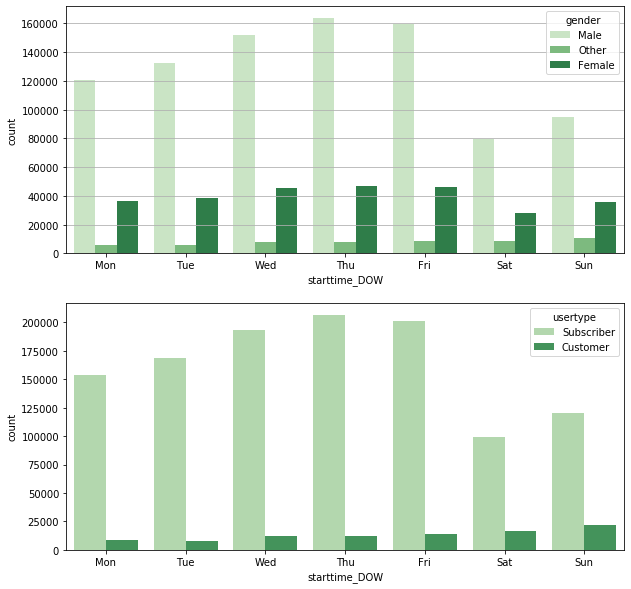

In [106]:
# plot some distribution for starttime_DOW

plt.figure(figsize = [10, 10]);

ax = plt.subplot(2, 1, 1);

sb.countplot(data = df, x = 'starttime_DOW', hue = 'gender', palette = 'Greens');

ax = plt.subplot(2, 1, 2);
sb.countplot(data = df, x = 'starttime_DOW', hue = 'usertype', palette = 'Greens');

plt.show()

> data from above plots:
    
- Thursday has the most male bikers compared to other days. when thursday and Friday have the most female bikers compared to other days.
- Tuesday has the most 'Subscriber' bikers compared to other days. Sunday has the most 'Customer' bikers compared to other days.

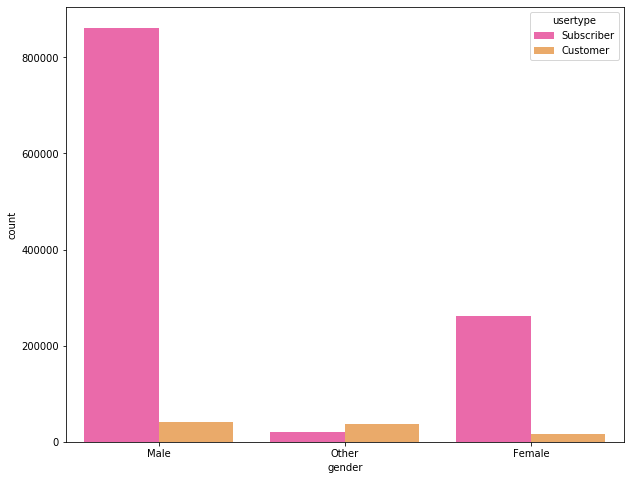

In [101]:
plt.figure(figsize = [10, 8]);

sb.countplot(data = df, x = 'gender', hue = 'usertype', palette = 'spring')
plt.show()

most 'subscribers' form male and most 'customers' males too

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Bikers rides on Saturday and Sunday have longer durations compared to bike rides on other weekdays.
> Bike rides start between 11:00 AM to 2:00 PM have the longest mean durations compared to other time frames.
> Female bikers bike longer on average compared to male bikers.
> Bikers with user_type 'Customer' bikes longer on average compared to bikers with user_type 'Subscriber'.
> The mean bike duration for female biker is longer than the the mean duration of the male bikers.
> The mean bike duration for 'Customer' biker is longer than the the mean duration of the 'Subscriber' bikers

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> The mean age of bikers on Tuesday and Wednesday are higher than the mean age of bikers on other days.
> The mean age of bikers on Sunday is lower than the mean age of bikers on other days.
> The mean age of bikers who start between 6:00 AM to 7:00 AM is higher compared to the mean age of bikers who start at other time frames.
> The mean age of male bikers is higher than the mean age of female bikers.
> The mean age of bikers who are belong to 'Subscriber' type is higher than the mean age of bikers who are belong to 'Customer' type.
> Tuesday, 5:00 PM has the highest biker counts across 7 days, 24 hours.
> 5:00 PM has the most male bikers compared to other hours. 8:00 AM and 5:00 PM have more female bikers compared to other hours.
> 5:00 PM has the most 'Subscriber' bikers compared to other hours. It also has the most 'Customer' bikers compared to other hours.
> Tuesday has the most male bikers compared to other days. It also has the most female bikers compared to other days.
> Tuesday has the most 'Subscriber' bikers compared to other days. Saturday has the most 'Customer' bikers compared to other days.
> Most 'Subscriber' are male. Most 'Customer' bikers are also male

## Multivariate Exploration


In [120]:
def log_trans(x, inverse = False):
    """ quick function for computing log and power operations """
    if not inverse:
        return np.log10(x)
    else:
        return np.power(10, x)

In [121]:
def hist2dgrid(x, y, **kwargs):
    palette = kwargs.pop('color');
    bins_x = np.arange(18, df['member_age'].max()+2, 2);
    bins_y = np.arange(0, 2, 0.1);
    plt.hist2d(x, y, bins = [bins_x, bins_y], cmap = palette, cmin = 0.5);
    plt.yticks(log_trans(np.array([1, 2, 5, 10, 20, 50, 100])),
               [1, 2, 5, 10, 20, 50, 100]);

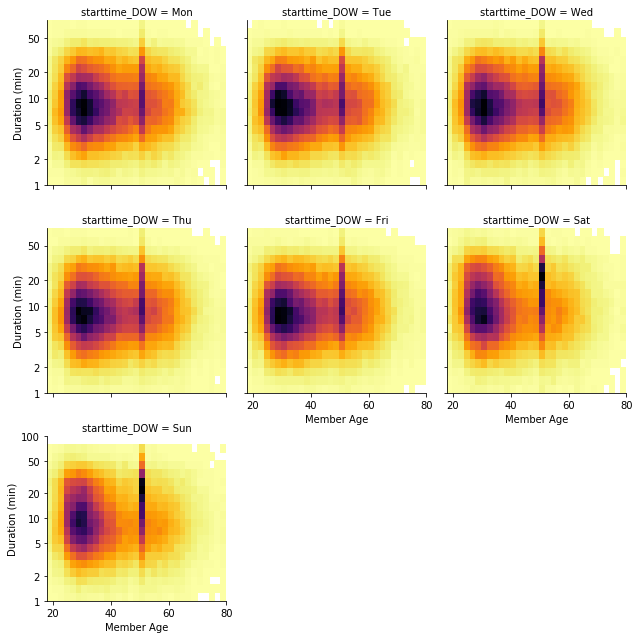

In [123]:
df['log_duration_min'] = df['duration_min'].apply(log_trans)
# create faceted heat maps on levels of the cut variable
g = sb.FacetGrid(data = df, col = 'starttime_DOW', col_wrap = 3, height = 3);
g.map(hist2dgrid, 'member_age', 'log_duration_min', color = 'inferno_r');
g.set_xlabels('Member Age');
g.set_ylabels('Duration (min)');

Bike rides on weekends [Saturday and Sunday] longer durations compared to bike rides on other weekdays.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> The features we investigated here are pretty much indenpendant from each other. We did not observed features that strengthened each other in terms of looking at features to my interest

### Were there any interesting or surprising interactions between features?

> Bike rides on Saturday and Sunday have longer durations compared to bike rides on other weekdays.
> Bikers rides start between 11:00 AM to 2:00 PM have the longest mean durations compared to other time frames.
> Female bikers bike longer on average compared to male bikers.
> 'Customer' bikers bike longer on average compared to 'Subscriber' bikers.
> The bikers are the least in 3:00 AM and 4:00 AM.